<a href="https://colab.research.google.com/github/yusufozkuttas/DSA210/blob/main/DSA_210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 4)


In [59]:

btc = pd.read_csv("Bitcoin History.csv")

btc.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


In [60]:

def clean_numeric(x):
    """
    '47,545.4' -> 47545.4
    '-' veya boşsa NaN
    """
    if pd.isna(x):
        return np.nan
    x = str(x).replace(",", "").strip()
    if x in ["", "-"]:
        return np.nan
    try:
        return float(x)
    except ValueError:
        return np.nan

def parse_volume(x):
    """
    '86.85K' -> 86850
    '1.2M'   -> 1200000
    '23,000' -> 23000
    '-'      -> NaN
    """
    if pd.isna(x):
        return np.nan
    s = str(x).replace(",", "").strip()
    if s in ["", "-"]:
        return np.nan
    if s.endswith("K"):
        return float(s[:-1]) * 1_000
    if s.endswith("M"):
        return float(s[:-1]) * 1_000_000
    try:
        return float(s)
    except ValueError:
        return np.nan

def parse_change_pct(x):
    """
    '4.97%' -> 0.0497
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip().replace("%", "")
    if s in ["", "-"]:
        return np.nan
    try:
        return float(s) / 100.0
    except ValueError:
        return np.nan


In [61]:


btc["Price"] = btc["Price"].apply(clean_numeric)
btc["Open"] = btc["Open"].apply(clean_numeric)
btc["High"] = btc["High"].apply(clean_numeric)
btc["Low"] = btc["Low"].apply(clean_numeric)

btc["Vol."] = btc["Vol."].apply(parse_volume)
btc["Change %"] = btc["Change %"].apply(parse_change_pct)

btc["Date"] = pd.to_datetime(btc["Date"], format="%b %d, %Y")
btc = btc.sort_values("Date").reset_index(drop=True)

btc.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0


In [62]:
btc["btc_ret"] = np.log(btc["Price"] / btc["Price"].shift(1))

btc["btc_vol_30d"] = btc["btc_ret"].rolling(30).std()

btc[["Date", "Price", "btc_ret", "btc_vol_30d"]].tail()


,Date,Price,btc_ret,btc_vol_30d
4950,2024-02-05,42697.2,0.002716,0.026135
4951,2024-02-06,43087.7,0.009104,0.026200
4952,2024-02-07,44339.8,0.028645,0.023610
4953,2024-02-08,45293.3,0.021276,0.023779
4954,2024-02-09,47545.4,0.048526,0.025349


In [63]:
gold = pd.read_csv("goldstock v2.csv")

gold.head()


,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2,2,2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
3,3,2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
4,4,2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8


In [64]:
if "Unnamed: 0" in gold.columns:
    gold = gold.drop(columns=["Unnamed: 0"])

gold["Date"] = pd.to_datetime(gold["Date"])

gold["Gold_Price"] = gold["Close/Last"].apply(clean_numeric)

gold = gold.sort_values("Date").reset_index(drop=True)
gold["gold_ret"] = np.log(gold["Gold_Price"] / gold["Gold_Price"].shift(1))
gold["gold_vol_30d"] = gold["gold_ret"].rolling(30).std()

gold[["Date", "Gold_Price", "gold_ret", "gold_vol_30d"]].tail()


,Date,Gold_Price,gold_ret,gold_vol_30d
2506,2024-06-27,2336.6,0.010065,0.011744
2507,2024-06-28,2339.6,0.001283,0.011401
2508,2024-07-01,2338.9,-0.000299,0.011386
2509,2024-07-02,2333.4,-0.002354,0.011080
2510,2024-07-03,2369.4,0.015310,0.011346


In [65]:


gpr = pd.read_excel("data_gpr_export.xls", engine="xlrd")

gpr.head()


,month,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_VNM,GPRHC_ZAF,var_name,var_label
0,1900-01-01,NaN,NaN,NaN,87.927849,64.717491,110.453522,NaN,NaN,3.171932,...,0.0,0.038840,0.0,0.0,2.718799,0.051787,0.012947,1.152253,month,Date (year/month)
1,1900-02-01,NaN,NaN,NaN,86.566490,71.936844,96.250488,NaN,NaN,3.122822,...,0.0,0.125471,0.0,0.0,2.732469,0.027882,0.000000,1.143176,GPR,Recent GPR (Index: 1985:2019=100)
2,1900-03-01,NaN,NaN,NaN,72.140701,57.475853,84.499428,NaN,NaN,2.602422,...,0.0,0.180366,0.0,0.0,2.151507,0.025767,0.000000,0.863180,GPRT,Recent GPR Threats (Index: 1985:2019=100)
3,1900-04-01,NaN,NaN,NaN,54.419449,37.326603,65.858208,NaN,NaN,1.963141,...,0.0,0.066774,0.0,0.0,1.776175,0.000000,0.000000,0.641026,GPRA,Recent GPR Acts (Index: 1985:2019=100)
4,1900-05-01,NaN,NaN,NaN,64.405197,48.200008,74.373955,NaN,NaN,2.323370,...,0.0,0.081522,0.0,0.0,1.970109,0.013587,0.000000,0.788043,GPRH,Historical GPR (Index: 1900:2019=100)


In [66]:
date_col = "month"
gpr_col = "GPR"


gpr["Date"] = pd.to_datetime(gpr[date_col])


gpr = gpr[["Date", gpr_col]].rename(columns={gpr_col: "GPR_value"})

gpr = gpr.sort_values("Date").set_index("Date")

gpr.head()

,GPR_value
Date,
1900-01-01,NaN
1900-02-01,NaN
1900-03-01,NaN
1900-04-01,NaN
1900-05-01,NaN


In [67]:
gpr_daily = gpr.resample("D").ffill()

gpr_daily.head()


,GPR_value
Date,
1900-01-01,NaN
1900-01-02,NaN
1900-01-03,NaN
1900-01-04,NaN
1900-01-05,NaN


In [68]:
btc_merged = (
    btc.set_index("Date")
       .join(gpr_daily, how="left")
       .ffill()
)

gold_merged = (
    gold.set_index("Date")
        .join(gpr_daily, how="left")
        .ffill()
)

btc_merged[["Price", "btc_ret", "GPR_value"]].head(), gold_merged[["Gold_Price", "gold_ret", "GPR_value"]].head()


(            Price  btc_ret  GPR_value
 Date                                 
 2010-07-18    0.1      NaN  79.381378
 2010-07-19    0.1      0.0  79.381378
 2010-07-20    0.1      0.0  79.381378
 2010-07-21    0.1      0.0  79.381378
 2010-07-22    0.1      0.0  79.381378,
             Gold_Price  gold_ret   GPR_value
 Date                                        
 2014-07-07      1317.0       NaN  138.753952
 2014-07-08      1316.5 -0.000380  138.753952
 2014-07-09      1324.3  0.005907  138.753952
 2014-07-10      1339.2  0.011188  138.753952
 2014-07-11      1337.4 -0.001345  138.753952)

In [69]:
corr_btc = btc_merged["btc_ret"].corr(btc_merged["GPR_value"])
corr_gold = gold_merged["gold_ret"].corr(gold_merged["GPR_value"])

print("Bitcoin return vs GPR correlation:", corr_btc)
print("Gold return vs GPR correlation   :", corr_gold)


Bitcoin return vs GPR correlation: -0.01603060784768031
Gold return vs GPR correlation   : 0.012255126095417622


In [70]:
median_gpr = btc_merged["GPR_value"].median()

btc_high = btc_merged[btc_merged["GPR_value"] >= median_gpr]["btc_ret"].dropna()
btc_low  = btc_merged[btc_merged["GPR_value"] <  median_gpr]["btc_ret"].dropna()

t_stat_btc, p_val_btc = stats.ttest_ind(btc_high, btc_low, equal_var=False)

print("BTC t-stat:", t_stat_btc)
print("BTC p-value:", p_val_btc)
print("High GPR mean return:", btc_high.mean())
print("Low  GPR mean return:", btc_low.mean())


BTC t-stat: -1.6921525895525422
BTC p-value: 0.09068500299955327
High GPR mean return: 0.0011751209250301772
Low  GPR mean return: 0.004136916821033057


In [71]:
median_gpr_g = gold_merged["GPR_value"].median()

gold_high = gold_merged[gold_merged["GPR_value"] >= median_gpr_g]["gold_ret"].dropna()
gold_low  = gold_merged[gold_merged["GPR_value"] <  median_gpr_g]["gold_ret"].dropna()

t_stat_gold, p_val_gold = stats.ttest_ind(gold_high, gold_low, equal_var=False)

print("Gold t-stat:", t_stat_gold)
print("Gold p-value:", p_val_gold)
print("High GPR mean return:", gold_high.mean())
print("Low  GPR mean return:", gold_low.mean())


Gold t-stat: 0.880759822877812
Gold p-value: 0.37853385876172274
High GPR mean return: 0.00039702101998935545
Low  GPR mean return: 6.778334951798943e-05


In [72]:
btc_summary = pd.DataFrame({
    "Group": ["Low GPR", "High GPR"],
    "Mean Return": [btc_low.mean(), btc_high.mean()],
    "Std Return": [btc_low.std(), btc_high.std()],
    "N Obs": [len(btc_low), len(btc_high)]
})

gold_summary = pd.DataFrame({
    "Group": ["Low GPR", "High GPR"],
    "Mean Return": [gold_low.mean(), gold_high.mean()],
    "Std Return": [gold_low.std(), gold_high.std()],
    "N Obs": [len(gold_low), len(gold_high)]
})

print("Bitcoin – High vs Low GPR")
display(btc_summary)

print("Gold – High vs Low GPR")
display(gold_summary)


Bitcoin – High vs Low GPR


,Group,Mean Return,Std Return,N Obs
0,Low GPR,0.004137,0.069172,2448
1,High GPR,0.001175,0.052718,2506


Gold – High vs Low GPR


,Group,Mean Return,Std Return,N Obs
0,Low GPR,0.000068,0.009905,1243
1,High GPR,0.000397,0.008777,1267


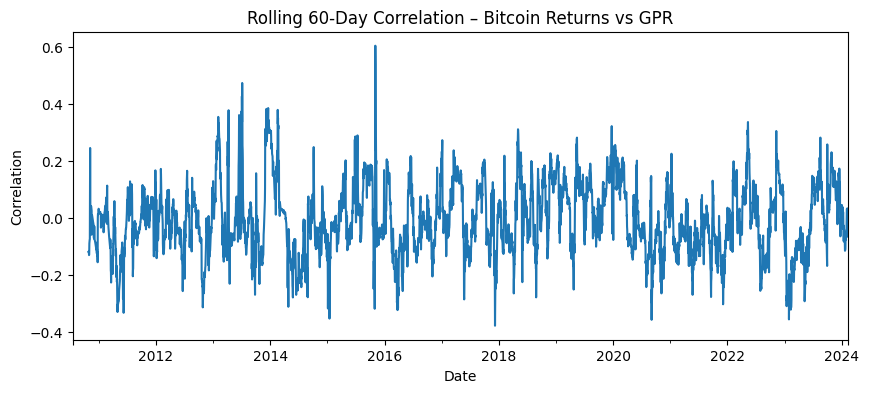

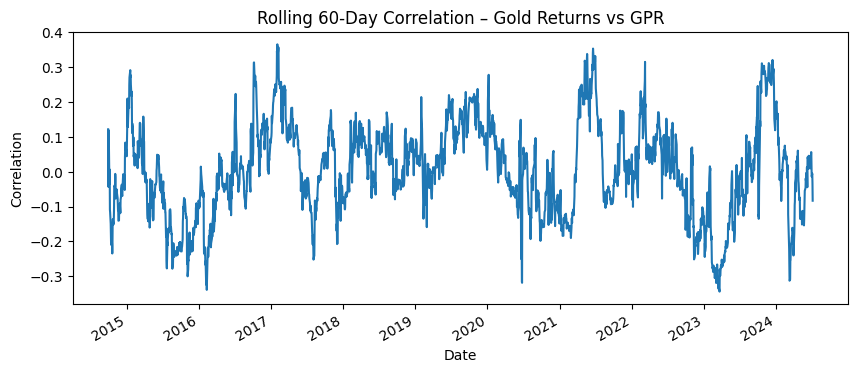

In [73]:
btc_merged["roll_corr_60d"] = (
    btc_merged["btc_ret"].rolling(60).corr(btc_merged["GPR_value"])
)

gold_merged["roll_corr_60d"] = (
    gold_merged["gold_ret"].rolling(60).corr(gold_merged["GPR_value"])
)

btc_merged["roll_corr_60d"].plot()
plt.title("Rolling 60-Day Correlation – Bitcoin Returns vs GPR")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()

gold_merged["roll_corr_60d"].plot()
plt.title("Rolling 60-Day Correlation – Gold Returns vs GPR")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()


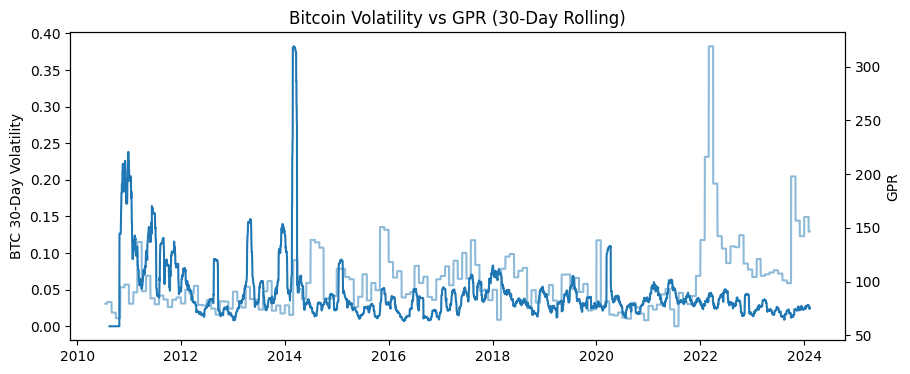

In [74]:
fig, ax1 = plt.subplots()

ax1.plot(btc_merged.index, btc_merged["btc_vol_30d"])
ax1.set_ylabel("BTC 30-Day Volatility")

ax2 = ax1.twinx()
ax2.plot(btc_merged.index, btc_merged["GPR_value"], alpha=0.5)
ax2.set_ylabel("GPR")

plt.title("Bitcoin Volatility vs GPR (30-Day Rolling)")
plt.show()


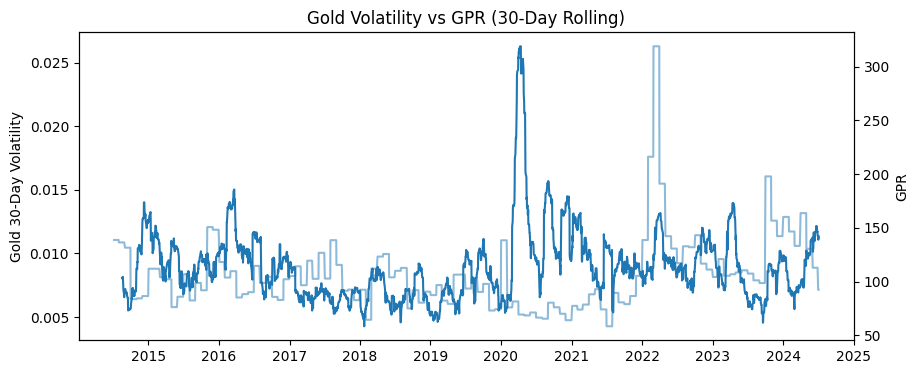

In [75]:
fig, ax1 = plt.subplots()

ax1.plot(gold_merged.index, gold_merged["gold_vol_30d"])
ax1.set_ylabel("Gold 30-Day Volatility")

ax2 = ax1.twinx()
ax2.plot(gold_merged.index, gold_merged["GPR_value"], alpha=0.5)
ax2.set_ylabel("GPR")

plt.title("Gold Volatility vs GPR (30-Day Rolling)")
plt.show()


In [76]:
print("---- Bitcoin vs GPR ----")
print("Correlation:", corr_btc)
print("t-stat:", t_stat_btc, "p-value:", p_val_btc)

print("\n---- Gold vs GPR ----")
print("Correlation:", corr_gold)
print("t-stat:", t_stat_gold, "p-value:", p_val_gold)

if p_val_gold < 0.05:
    print("\nGold returns differ significantly between high and low GPR periods (safe-haven davranışı ile uyumlu).")
else:
    print("\nGold returns difference is not statistically significant at 5% level.")

if p_val_btc < 0.05:
    print("Bitcoin returns also differ significantly between high and low GPR periods (daha risk hassas).")
else:
    print("Bitcoin returns difference is not statistically significant at 5% level.")


---- Bitcoin vs GPR ----
Correlation: -0.01603060784768031
t-stat: -1.6921525895525422 p-value: 0.09068500299955327

---- Gold vs GPR ----
Correlation: 0.012255126095417622
t-stat: 0.880759822877812 p-value: 0.37853385876172274

Gold returns difference is not statistically significant at 5% level.
Bitcoin returns difference is not statistically significant at 5% level.
